<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

# Mock_Test

## Install Packages

In [5]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [663]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [487]:
#Load data
df_2023_Ask = pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")
df_2023_Bid = pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")

In [489]:
print(df_2023_Ask.head(3))
print(df_2023_Ask.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125    0.351
1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141    1.155
2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027    0.882
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712


In [491]:
print(df_2023_Bid.head(3))
print(df_2023_Bid.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746    0.069
35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756    0.216
35219  2023.06.30 20:55:00  22.756  22.766  22.701  22.745    0.327


In [492]:
df_2023_Ask.head(3)

,Time (UTC),Open,High,Low,Close,Volume
0,2023.01.02 23:00:00,24.102,24.125,24.083,24.125,0.351
1,2023.01.02 23:05:00,24.094,24.188,24.094,24.141,1.155
2,2023.01.02 23:10:00,24.143,24.148,24.022,24.027,0.882


In [495]:
df_2023_Ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [496]:
df_2023_Bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


<html> <h3 style="font-style:italic; color:blue;"> Merge DataFrame </h3> </html>

In [498]:
df_2023 = df_2023_Bid.merge(df_2023_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')

df_2023

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [501]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open_x      35220 non-null  float64
 2   High_x      35220 non-null  float64
 3   Low_x       35220 non-null  float64
 4   Close_x     35220 non-null  float64
 5   Volume _x   35220 non-null  float64
 6   Open_y      35220 non-null  float64
 7   High_y      35220 non-null  float64
 8   Low_y       35220 non-null  float64
 9   Close_y     35220 non-null  float64
 10  Volume _y   35220 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


In [502]:
# rename columns

df_2023.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [504]:
df_2023.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044


In [505]:
df_2023.tail()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836
35219,2023.06.30 20:55:00,22.756,22.766,22.701,22.745,0.3270,22.786,22.811,22.786,22.811,0.3712


In [508]:
#save file
file_obj2 = open('df_2023.csv', 'w')
df_2023.to_csv('df_2023.csv', encoding='utf-8', index=False)
file_obj2.close()

In [509]:
df_2023 = []

df_2023

[]

In [512]:
df = pd.read_csv('df_2023.csv', low_memory=False, sep=',')

In [513]:
#add new columns
df["Volume_Delta"] = df["Volume_Ask"] - df["Volume_Bid"]
df["Volume_Delta_abs"] = (df["Volume_Ask"] - df["Volume_Bid"]).abs()

In [514]:
df["Open_Delta"] = df["Open_Ask"]  - df["Open_Bid"]
df["High_Delta"] = df["High_Ask"]  - df["High_Bid"]
df["Low_Delta"]  = df["Low_Ask"]   - df["Low_Bid"]
df["Close_Delta"]= df["Close_Ask"] - df["Close_Bid"]

In [515]:
df.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,23.357365,23.374611,23.338437,23.357367,8.283187,23.387577,23.404824,23.368703,23.387501,35.095338,26.812151,26.908678,0.030212,0.030212,0.030266,0.030134
std,1.368781,1.368825,1.368926,1.368867,8.976407,1.368779,1.368797,1.368944,1.368861,39.024921,33.422609,33.344942,0.003245,0.003380,0.005014,0.003851
min,19.893000,19.914000,19.888000,19.893000,0.000000,19.923000,19.944000,19.918000,19.923000,0.000000,-48.791200,0.000000,0.011000,0.018000,0.001000,0.012000
25%,22.421750,22.440000,22.400000,22.421000,2.611050,22.452000,22.470000,22.430000,22.451000,9.467675,5.170550,5.237100,0.030000,0.030000,0.030000,0.030000
50%,23.560000,23.576000,23.543000,23.560000,5.331100,23.590000,23.607000,23.573000,23.590000,22.237450,14.907800,14.937300,0.030000,0.030000,0.030000,0.030000
75%,24.122000,24.144000,24.103000,24.122000,10.686275,24.153000,24.174000,24.133000,24.152000,46.639375,36.154925,36.159175,0.030000,0.030000,0.030000,0.030000
max,26.118000,26.123000,26.098000,26.118000,120.651700,26.148000,26.153000,26.128000,26.148000,365.632200,317.585800,317.585800,0.185000,0.222000,0.409000,0.309000


In [516]:
#remove linearly dependent variables
data = df.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask'], axis=1)

In [517]:
data.shape

(35220, 13)

In [518]:
data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050


<html> <h3 style="font-style:italic; color:blue;"> Data transformation </h3> </html>

In [520]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [521]:
data = data.drop(['Local time'], axis=1)

In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Open_Bid          35220 non-null  float64            
 1   High_Bid          35220 non-null  float64            
 2   Low_Bid           35220 non-null  float64            
 3   Close_Bid         35220 non-null  float64            
 4   Volume_Bid        35220 non-null  float64            
 5   Volume_Ask        35220 non-null  float64            
 6   Volume_Delta      35220 non-null  float64            
 7   Volume_Delta_abs  35220 non-null  float64            
 8   Open_Delta        35220 non-null  float64            
 9   High_Delta        35220 non-null  float64            
 10  Low_Delta         35220 non-null  float64            
 11  Close_Delta       35220 non-null  float64            
 12  Local_time_T      35220 non-null  datetime64[ns, UTC]
dtypes

In [525]:
data.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T
0,24.036,24.059,24.017,24.059,0.3480,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00
1,24.064,24.130,24.064,24.092,1.8458,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049,2023-01-02 23:05:00+00:00
2,24.094,24.098,23.972,23.977,0.9030,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050,2023-01-02 23:10:00+00:00


<html> <h3 style="font-style:italic; color:blue;"> Data Visualization </h3> </html>

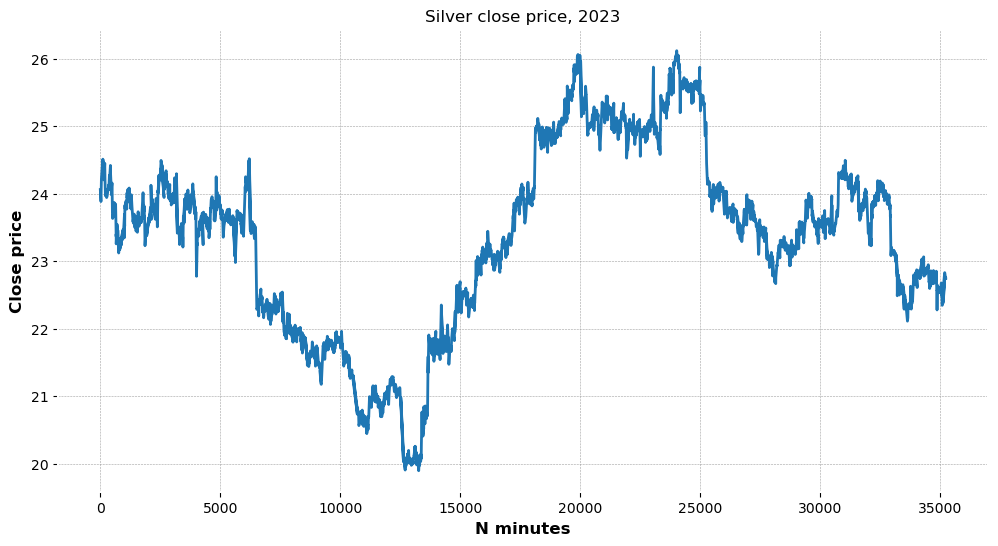

In [528]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('Silver close price, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

## Candlestick chart

In [532]:
data_chart = data.set_index('Local_time_T', inplace=False)

In [533]:
data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                        'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)

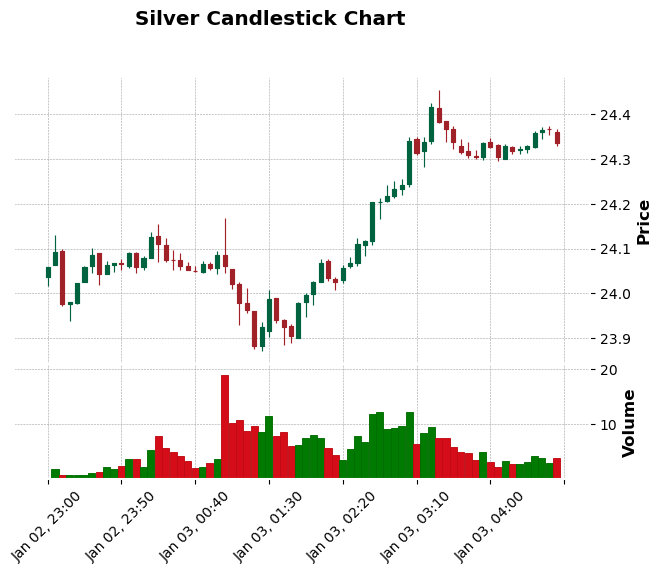

In [534]:
import mplfinance as mpf

data_chart.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
mpf.plot(data_chart.iloc[0:70], type='candle', style='charles', title='Silver Candlestick Chart', volume=True)

In [535]:
data_chart = []

In [609]:
data['Y_High_Bid'] = data['High_Bid']
data['Y_Low_Ask'] = data['Low_Bid'] + data['Low_Delta']
data = data.drop(['Local_time_T'],axis=1)

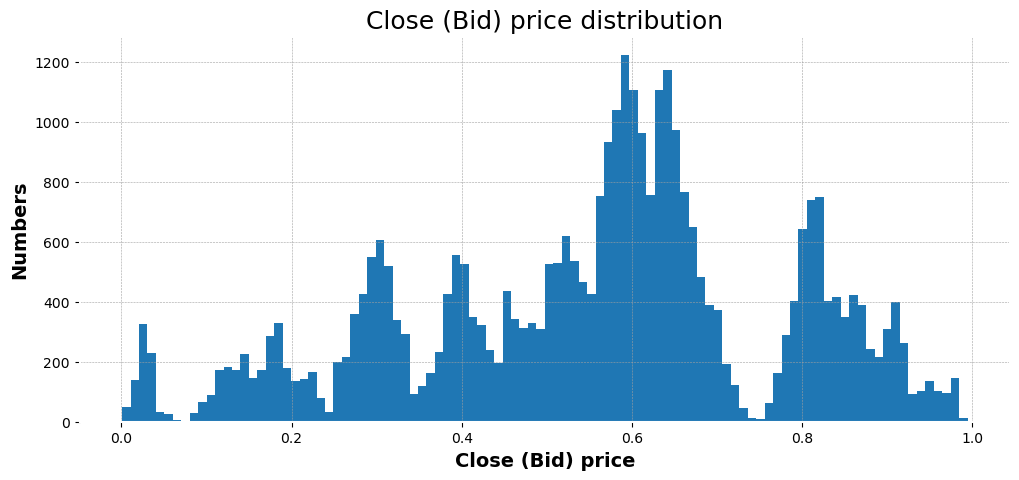

In [611]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Close_Bid'],bins=100)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14);
plt.show()

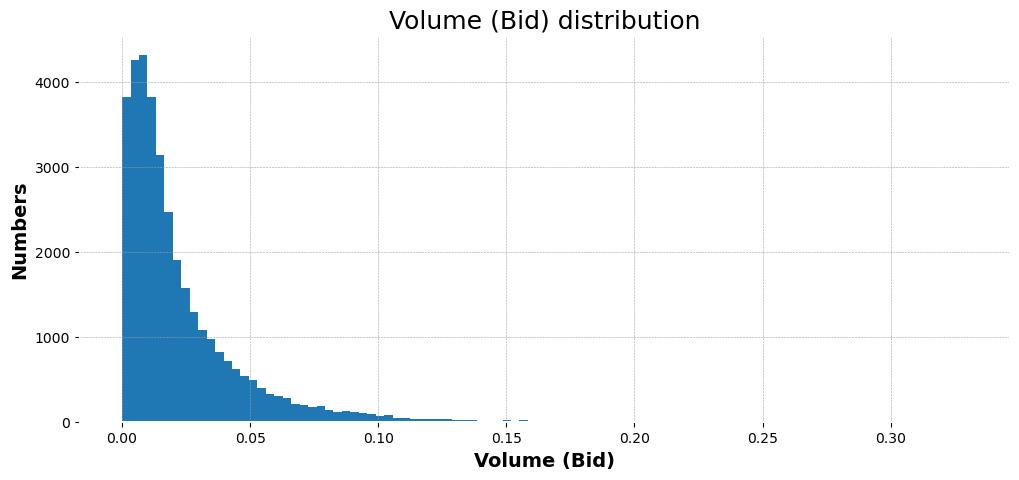

In [612]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14);
plt.show()

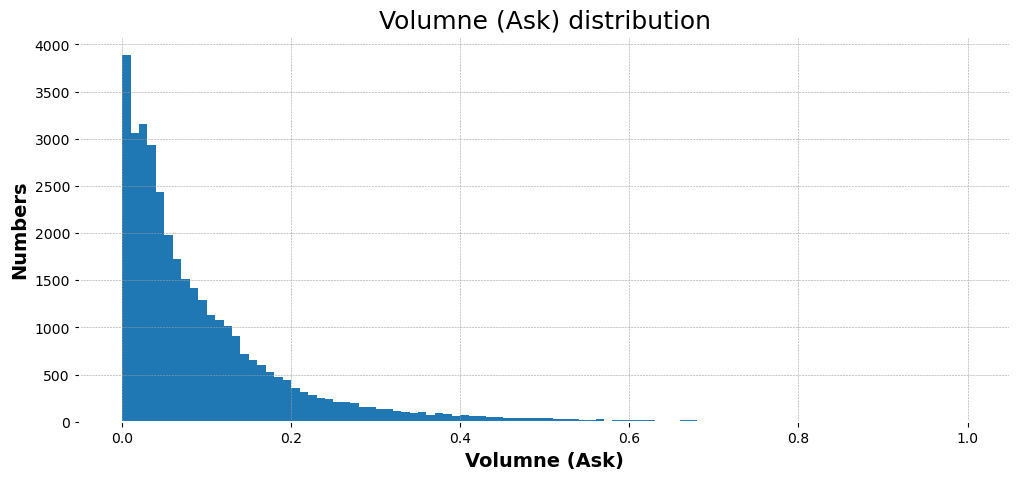

In [614]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Volumne (Ask) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volumne (Ask)',size=14);
plt.show()

<html> <h2 style="font-style:italic; color:blue;"> Data Normalisation </h2> </html>

##### Train / Validation / Test Split
- ~80% for training
- ~10% for validation
- ~10% for testing

In [617]:
data_length = len(data)
data_length

35220

In [619]:
train_size = int(round(data_length * 0.8, -3))
train_size

28000

In [620]:
train = data.iloc[:train_size]
train.shape

(28000, 14)

<html> <h4 style="font-style:italic; color:blue;"> Find Max and Min for Prices, Volumes and Deltas </h4> </html>

In [626]:
# Max price is Max High_Ask = High_Bid + High_Delta
# Min price is Min Low_Bid

# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

# Max_Delta = Max{Open_Delta, High_Delta, Low_Delta, Close_Delta}
# Min_Delta = Min{Open_Delta, High_Delta, Low_Delta, Close_Delta}

In [627]:
max_price = (train['High_Bid'] + train['High_Delta']).max()
max_price

1.9010556482623604

In [630]:
min_price = train['Low_Bid'].min()
min_price

0.0

In [632]:
max_volume = max(max(train['Volume_Bid']),max(train['Volume_Ask']))
max_volume

1.0

In [634]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta = round(max_Delta, 3)
max_Delta

1.0

In [635]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta = round(min_Delta, 3)
min_Delta

-0.0

In [638]:
max_volume_Delta = train['Volume_Delta'].max()
max_volume_Delta

1.0

In [639]:
min_volume_Delta = train['Volume_Delta'].min()
min_volume_Delta

0.0

In [642]:
max_volume_Delta_abs = train['Volume_Delta_abs'].max()
max_volume_Delta_abs

1.0

In [644]:
min_volume_Delta_abs = train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [646]:
data['Open_Bid'] = ( data['Open_Bid'] - min_price ) / (max_price-min_price)
data['High_Bid']  = ( data['High_Bid']  - min_price ) / (max_price-min_price)
data['Low_Bid']   = ( data['Low_Bid']   - min_price ) / (max_price-min_price)
data['Close_Bid'] = ( data['Close_Bid'] - min_price ) / (max_price-min_price)
data['Y_High_Bid'] = ( data['Y_High_Bid'] - min_price ) / (max_price-min_price)
data['Y_Low_Ask']  = ( data['Y_Low_Ask']  - min_price ) / (max_price-min_price)


In [648]:
data['Volume_Ask']  = data['Volume_Ask'] / max_volume
data['Volume_Bid']  = data['Volume_Bid'] / max_volume

In [650]:
data['Volume_Delta'] = ( data['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [652]:
data['Volume_Delta_abs']  = data['Volume_Delta_abs'] / max_volume_Delta_abs

In [654]:
data['Open_Delta']  = ( max_Delta - data['Open_Delta'] )  / (max_Delta-min_Delta)
data['High_Delta']  = ( max_Delta - data['High_Delta'] )  / (max_Delta-min_Delta)
data['Low_Delta']   = ( max_Delta - data['Low_Delta'] )   / (max_Delta-min_Delta)
data['Close_Delta'] = ( max_Delta - data['Close_Delta'] ) / (max_Delta-min_Delta)

In [656]:
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
0,0.348275,0.350207,0.346680,0.350207,0.000952,0.000960,0.133180,0.000009,0.211039,0.211039,0.211039,0.211039,0.350207,0.761692
1,0.350626,0.356168,0.350626,0.352977,0.005048,0.003159,0.131287,0.002175,0.094156,0.185065,0.094156,0.155844,0.356168,0.827122
2,0.353145,0.353481,0.342902,0.343322,0.002470,0.002412,0.133115,0.000066,0.155844,0.159091,0.159091,0.159091,0.353481,0.785240
3,0.343322,0.343574,0.340047,0.343574,0.002445,0.002445,0.133172,0.000000,0.155844,0.152597,0.152597,0.152597,0.343574,0.785801
4,0.343406,0.347268,0.343238,0.347184,0.002429,0.002474,0.133217,0.000052,0.152597,0.155844,0.149351,0.159091,0.347268,0.790699


In [658]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
 12  Y_High_Bid        35220 non-null  float64
 13  Y_Low_Ask         35220 non-null  float64
dtypes: float64(14)
memory usage: 3.8 MB


<html> <h4 style="font-style:italic; color:blue;"> LSTM </h4> </html>

In [668]:
np.random.seed(19)

In [671]:
# We will predict the Highest and Lowest prices DURING the next 5 minutes. 

# To do this in the data output (vector of answers), we shift prices sequentially to 5 minutes up, 
# and find max and min prices during these 5 minutes
# Then you need to delete the 5 last rows since there are no prices for the next 5 minutes. 
# Therefore, we will create an array of answers "data_ay" with the Highest and Lowest prices shifted sequentially to 5 rows up.

In [673]:
n=data.shape[0]
n

35220

In [675]:
p=data.shape[1]
p

14

<html> <h3 style="font-style:italic; color:blue;">Separate input and outputs matrix </h3> </html>

In [679]:
#create the input dataframe
data_ax = data.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [683]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
dtypes: float64(12)
memory usage: 3.2 MB


In [697]:
#create the input dataframe
data_ay = data[['Y_High_Bid', 'Y_Low_Ask']]

In [699]:
data_ay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Y_High_Bid  35220 non-null  float64
 1   Y_Low_Ask   35220 non-null  float64
dtypes: float64(2)
memory usage: 550.4 KB


In [701]:
#we shift by 5-minutes(one-row) up
data_ay = data_ay.shift(-1)

In [703]:

# # create new colomns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 5 minutes

# # Forward-looking window
# indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

# data_ay['Y_High_Bid_5'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
# data_ay['Y_Low_Ask_5']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

In [705]:
data_ay

,Y_High_Bid,Y_Low_Ask
0,0.356168,0.827122
1,0.353481,0.785240
2,0.343574,0.785801
3,0.347268,0.790699
4,0.350374,0.794897
...,...,...
35215,0.240384,0.700249
35216,0.240384,0.716459
35217,0.241224,0.701957
35218,0.241643,0.618748


In [707]:
# delete the last 5 rows
data_ay = data_ay.iloc[:-1]
data_ax = data_ax.iloc[:-1]

In [715]:
data_ay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35219 entries, 0 to 35218
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Y_High_Bid  35219 non-null  float64
 1   Y_Low_Ask   35219 non-null  float64
dtypes: float64(2)
memory usage: 550.4 KB


In [709]:
data_ay.shape

(35219, 2)

In [711]:
data_ax.shape

(35219, 12)

In [713]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


data_a:
[[3.4828e-01 3.5021e-01 3.4668e-01 3.5021e-01 9.5178e-04 9.5998e-04
  1.3318e-01 9.4463e-06 2.1104e-01 2.1104e-01 2.1104e-01 2.1104e-01]
 [3.5063e-01 3.5617e-01 3.5063e-01 3.5298e-01 5.0482e-03 3.1589e-03
  1.3129e-01 2.1752e-03 9.4156e-02 1.8506e-01 9.4156e-02 1.5584e-01]]


[[2.4038e-01 2.4038e-01 2.3996e-01 2.3996e-01 1.8871e-04 1.1520e-03
  1.3413e-01 1.1090e-03 9.4156e-02 9.4156e-02 9.4156e-02 9.4156e-02]
 [2.3996e-01 2.4122e-01 2.3912e-01 2.4080e-01 5.9076e-04 1.8696e-03
  1.3445e-01 1.4724e-03 9.4156e-02 1.1364e-01 1.2013e-01 9.4156e-02]]
numpy size: =  (35219, 12)
type:  float64


In [717]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0.35616789 0.82712172]
 [0.35348109 0.78523982]
 [0.34357355 0.78580084]]


[[0.24038394 0.71645946]
 [0.24122356 0.70195689]
 [0.24164337 0.61874839]]
numpy size: =  (35219, 2)
type:  float64


<html> <h3 style="font-style:italic; color:blue;"> Create the 3D inputs tensor, and 2D outputs matrix </h3> </html>

In [728]:
# We will analyse only part of the dataset since training the neural network with 
# an entire dataset would require massive computer power.

# n_small = 30,000 rows 

# We need a three-dimensional data tensor: [(n_small-N ), N, 12] and
# two-dimensional array of answers [(n_small-N ), 2] with the High and Low prices DURING the next 5 minutes

# where N=50 is the number of minutes for analysis at each step; those are looking backwards 

# Therefore, we need:
# three-dimensional data tensor of sliced graphs [(n_small - N - 5), N, 12] and
# two-dimensional matrix of answers Y[(n_small - N - 5), 2] with the High and Low prices shifted sequentially to 5 rows up.

In [730]:
from tqdm import tqdm

In [732]:
n_small = 30000
N=50

L=n_small-N
t=data_a.shape[1]
print('Size of a three-dimensional inputs tensor: ',L,N,t)

Size of a three-dimensional inputs tensor:  29950 50 12


In [734]:
# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [736]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

Y = np.zeros((L, 2), dtype= 'float32') # We will predict two prices - normalised High_Bid and normalised Low_Ask

In [738]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 

#print('L = n - N = ', n-N, L)
print('L = n_small - N - 5 = ', n_small-N-5, L)
#for k in tqdm(range(L-1)):
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid - max 5 minutes future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask -  min 5 minutes future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


100%|██████████| 29950/29950 [00:00<00:00, 59246.53it/s]

29949
data_b: 
 [[[0.34827542 0.35020655 0.34668016 ... 0.21103896 0.21103896 0.21103896]
  [0.35062638 0.35616788 0.35062638 ... 0.18506494 0.09415584 0.15584415]
  [0.35314524 0.35348108 0.34290186 ... 0.1590909  0.1590909  0.1590909 ]
  ...
  [0.36355656 0.36632732 0.3630528  ... 0.09415584 0.09415584 0.09415584]
  [0.36489996 0.36666316 0.3637245  ... 0.08116883 0.09415584 0.09415584]
  [0.36573958 0.37463957 0.36515185 ... 0.09415584 0.09415584 0.09415584]]

 [[0.35062638 0.35616788 0.35062638 ... 0.18506494 0.09415584 0.15584415]
  [0.35314524 0.35348108 0.34290186 ... 0.1590909  0.1590909  0.1590909 ]
  [0.34332165 0.34357354 0.34004712 ... 0.1525974  0.1525974  0.1525974 ]
  ...
  [0.36489996 0.36666316 0.3637245  ... 0.08116883 0.09415584 0.09415584]
  [0.36573958 0.37463957 0.36515185 ... 0.09415584 0.09415584 0.09415584]
  [0.37421978 0.37463957 0.37119713 ... 0.09415584 0.09415584 0.09415584]]

 [[0.35314524 0.35348108 0.34290186 ... 0.1590909  0.1590909  0.1590909 ]
  [0.3

In [740]:
# Control of the correctness of filling the array Y 
# (should show MAX of the normalised prices High_Bid and Low_Ask - during 5 next minutes(step) ahead)


import random

pp = random.randint(50, L) # (any number before 29950) - just to look at the middle of data_b
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  16796
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
0.28169337 		 0.28060186
0.28060186 		 0.2805179
0.2805179 		 0.27976224
0.27976224 		 0.2798462
0.2798462 		 0.2793424
0.2793424 		 0.27858678
0.27858678 		 0.27749527
0.27749527 		 0.27724338
0.27724338 		 0.27749527
0.27749527 		 0.27682355
0.27682355 		 0.2769075
0.2769075 		 0.27774715
0.27774715 		 0.27774715
0.27774715 		 0.2782509
0.2782509 		 0.27909052


In [742]:
#clean memory
data = []
data_ax = []
data_ay = []
data_a = []
data_y = []

<html> <h3 style="font-style:italic; color:blue;"> Create and train neural network </h3> </html>

In [747]:
from sklearn.model_selection import train_test_split

In [749]:
X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, shuffle = False, stratify = None, random_state=101) 

In [751]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26955, 50, 12)
(26955, 2)
(2995, 50, 12)
(2995, 2)


<html> <h3 style="color:blue;"> LSTM </h3> </html>

In [757]:
model = keras.Sequential([
    keras.layers.LSTM(100, activation='relu', input_shape=(50, 12)),
    keras.layers.Dense(2)
])

C:\Users\agyem\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [759]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100)            │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,402 (177.35 KB)

 Trainable params: 45,402 (177.35 KB)

 Non-trainable params: 0 (0.00 B)

None


<html> <h3 style="font-style:italic; color:blue;"> Callbacks </h3> </html>

In [761]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [763]:
# Early Stopping parameters

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_LSTM_GOLD.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [765]:
history = model.fit(X_train, y_train, batch_size=20, epochs=20, validation_split=0.1, shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0115 - mae: 0.0382
Epoch 1: val_loss improved from inf to 0.00005, saving model to best_model_LSTM_GOLD.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - loss: 0.0115 - mae: 0.0382 - val_loss: 5.4272e-05 - val_mae: 0.0037
Epoch 2/20
1211/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.6329e-05 - mae: 0.0042
Epoch 2: val_loss did not improve from 0.00005
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - loss: 5.6318e-05 - mae: 0.0042 - val_loss: 5.8934e-05 - val_mae: 0.0045
Epoch 3/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 4.7617e-05 - mae: 0.0041
Epoch 3: val_loss improved from 0.00005 to 0.00004, saving model to best_model_LSTM_GOLD.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 4.7616e-05 - mae: 0.0041 - val_loss: 4.4426e-05 - val_mae: 0.0032
Epoch 4/20
1211/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.4825e-05 - mae: 0.0035
Epoch 4: val_loss improved from 0.00004 to 0.00004, saving model t

In [766]:
LSTM_saved_best_model = keras.models.load_model('best_model_LSTM_GOLD.keras')

<html> <h3 style="font-style:italic; color:blue;"> Test </h3> </html>

In [770]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.4854e-05 - mae: 0.0015


In [771]:
scores

[6.924138870090246e-05, 0.0016449791146442294]

In [772]:
print("Mean squared error (mse): %.9f " % (scores[0]))

Mean squared error (mse): 0.000069241 


In [773]:
print("Mean absolute error (mae): %.9f " % (scores[1]))

Mean absolute error (mae): 0.001644979 


<html> <h2 style="font-style:italic; color:blue;"> Visualisation </h2> </html>

<html> <h3 style="font-style:italic; color:blue;"> MSE training graphs </h3> </html>

In [776]:
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error', size=14)

Text(0.5, 0, 'Mean Squared Error')

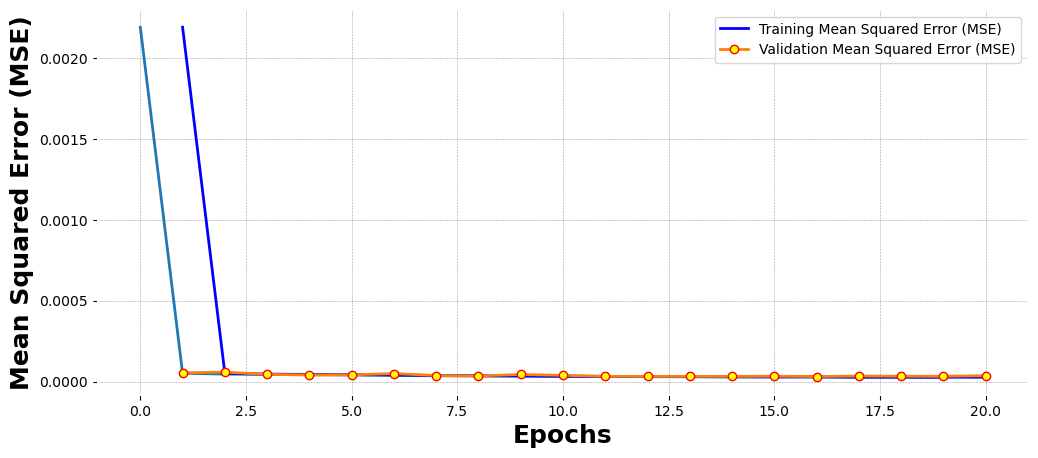

In [777]:
# More detailed MSE graph

history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

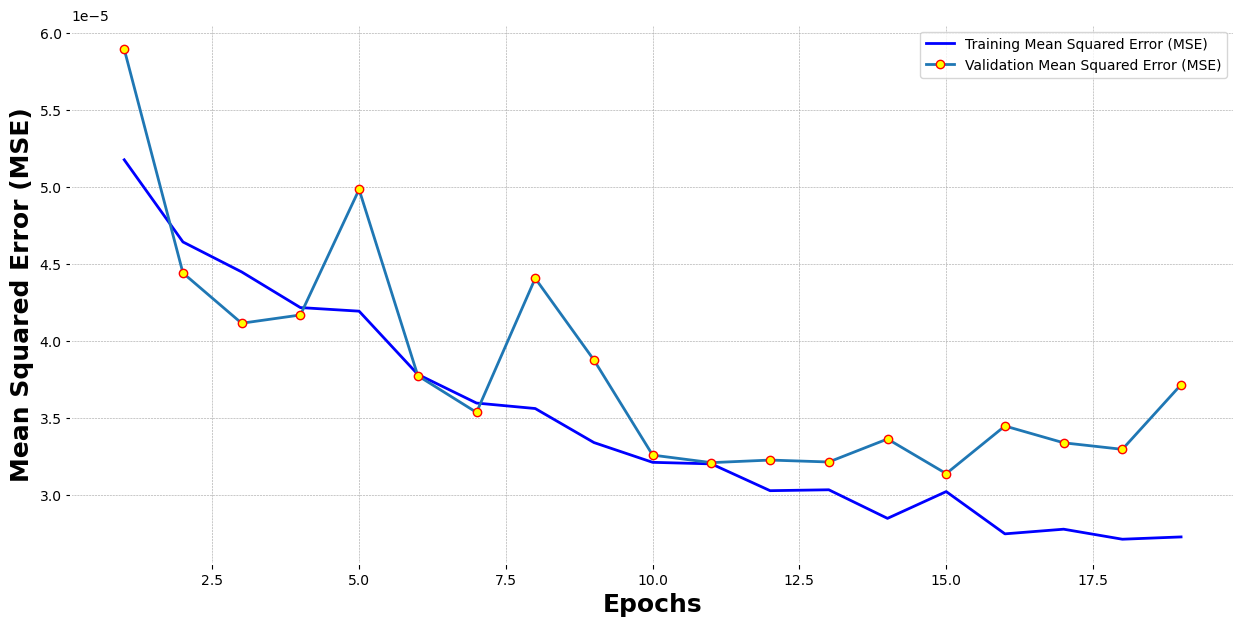

In [778]:
# deleted the 1st epoch
# to examine in detail the results of the remaining epochs

history_dict = history.history

mse_values = history_dict['loss'][1:]
val_mse_values = history_dict['val_loss'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> MAE training graphs </h3> </html>

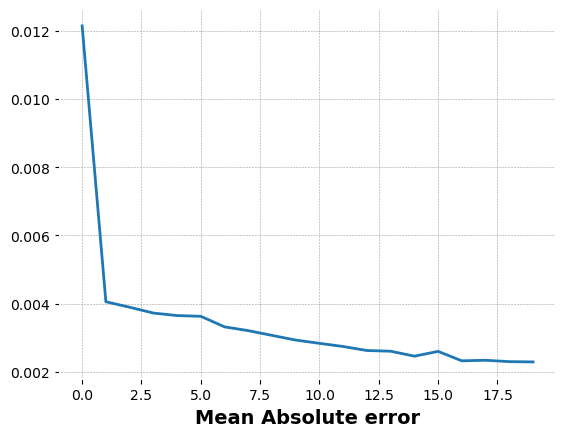

In [780]:
plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error', size=14)
plt.show()

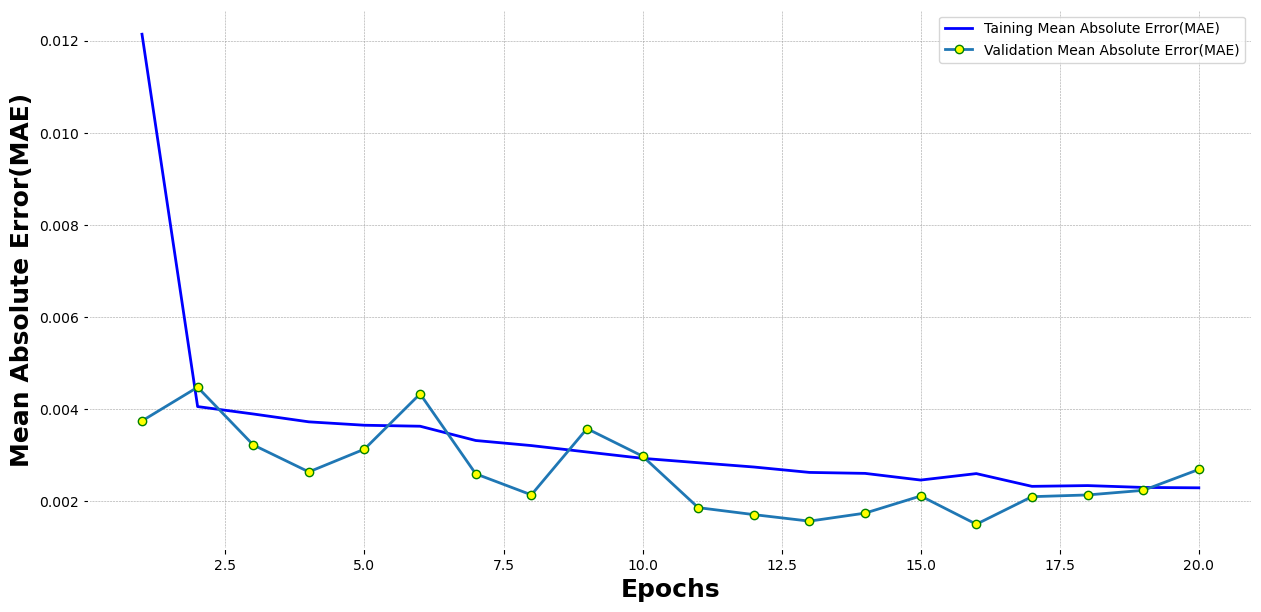

In [781]:
history_dict = history.history

mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mae_values, 'b', label='Taining Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error(MAE)', size=18)
plt.legend()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> Prediction 5 minute ahead </h3> </html>

In [783]:
pred = LSTM_saved_best_model(X_test)
print(pred)

tf.Tensor(
[[0.3335626  0.8077437 ]
 [0.3336053  0.807779  ]
 [0.3338456  0.8080925 ]
 ...
 [0.30909213 0.782893  ]
 [0.30890167 0.78260756]
 [0.30899337 0.78263634]], shape=(2995, 2), dtype=float32)


<html> <h3 style="font-style:italic; color:blue;"> Price chart </h3> </html>

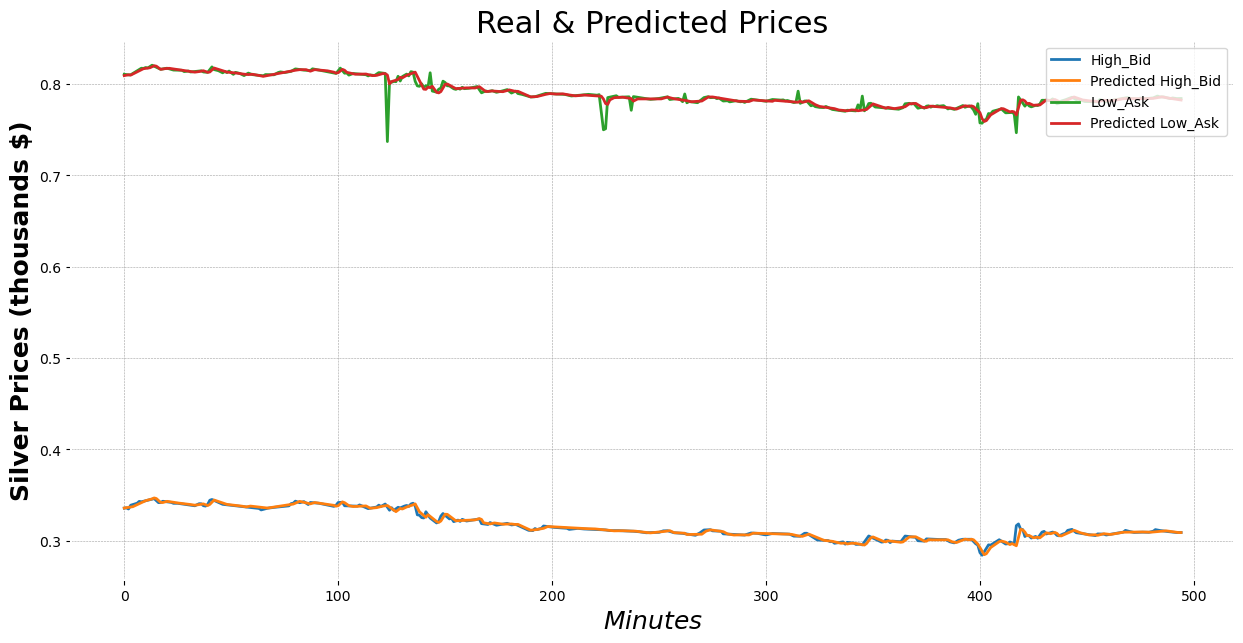

In [785]:
N1=2500  # The first minute for the chart  
LL = 500  # Duration (in minutes) for the chart
N2=N1+LL  # the last minute for the chart

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Prices', size=22)
plt.ylabel('Silver Prices (thousands $)', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()


<html> <h3 style="font-style:italic; color:blue;"> Error Chart </h3> </html>

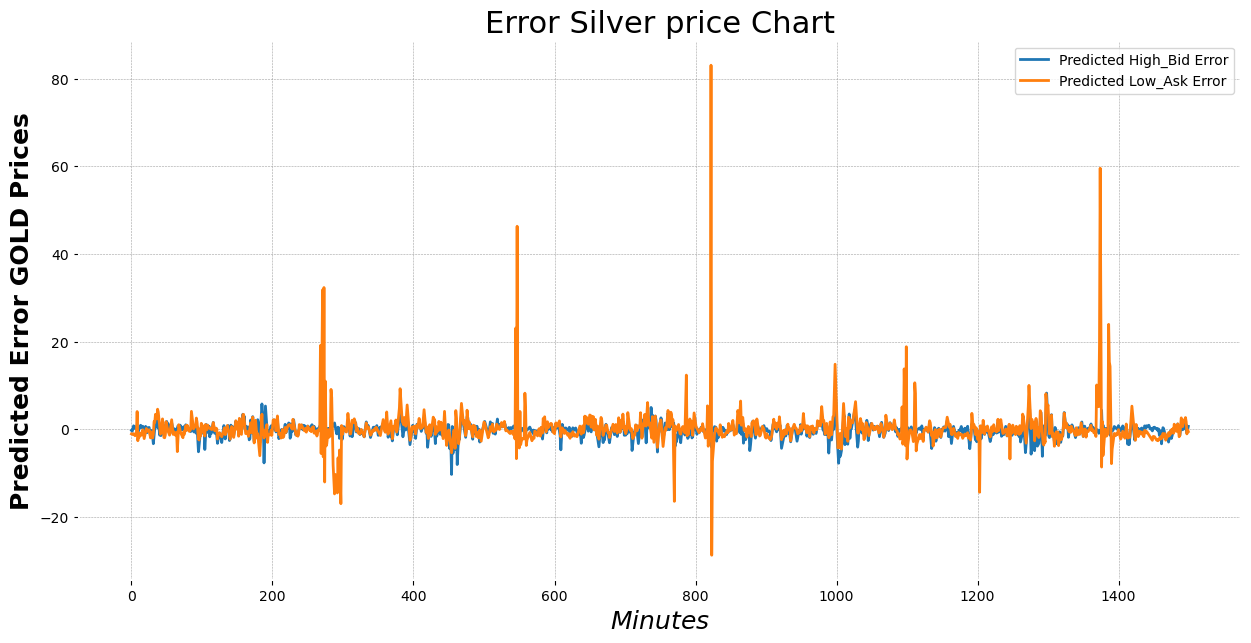

In [788]:
N1=0  # The first minute for the chart  
LL = 1500  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)

# in $ (absolute price)
a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000
b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000

# in %
#a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000/ average_price *100
#b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000/ average_price *100


line1, = ax1.plot(a, label='Predicted High_Bid Error')
line2, = ax1.plot(b, label='Predicted Low_Ask Error')

plt.title('Error Silver price Chart', size=22)
plt.ylabel('Predicted Error GOLD Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()